Project Lara Deliverable 1

This notebook sets up the DataFrame for use later on, exploring what is contained inside, and providing the visualizations of the current dataset prior to the data wrangling in notebook 02. 

The code cell below fetches the dataset from sklearn datasets, we will fetch and import in the 'adult' dataset, containing USA Census data from 1994 to train a model later on bias auditing, to be applied to other datasets of similar characteristics. 

In [26]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml('adult', version=2, as_frame=True)
df = data.frame

print(df.shape)
print(df.dtypes)
df.head()

(48842, 15)
age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In this section we go ahead and take a look at the row proportions for each sex and the class they fall under from reported income. the 1994 dataset does not include hard numbers for income per person, only using a categorical variable.

In [27]:
# df['class'].value_counts()
# df['sex'].value_counts()
# df['race'].value_counts()
pd.crosstab(df['sex'], df['class'], normalize='index')

class,<=50K,>50K
sex,,
Female,0.890749,0.109251
Male,0.696233,0.303767


In [28]:
pd.crosstab(df['race'], df['class'], normalize='index')

class,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.882979,0.117021
Asian-Pac-Islander,0.730744,0.269256
Black,0.879189,0.120811
Other,0.876847,0.123153
White,0.746013,0.253987


In [29]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


in this section we are looking for all categorical variables and putting them into a list for output, and then verifying the capital gain column is skewed. later on in the notebook you will see that when visualized, it is more pronounced rather than just viewing the numbers itself. 

In [30]:
df.select_dtypes(include=['object', 'category']).columns.tolist()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [31]:
df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

this is the visualization section, showing capital gain distribution, age distribution, and hours per week distribution, to get a better understanding how the reported workforce was in 1994.

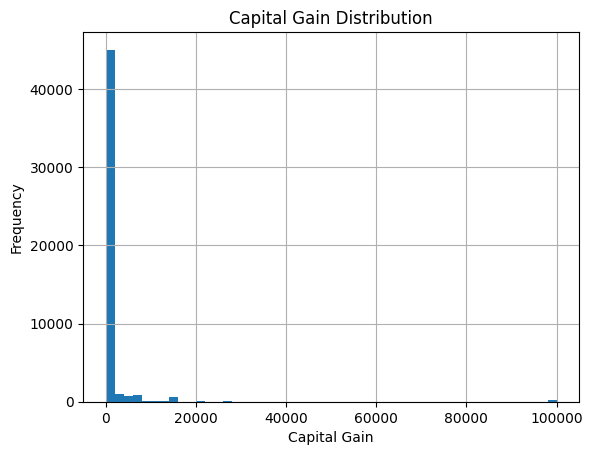

In [32]:
import matplotlib.pyplot as plt
df['capital-gain'].hist(bins=50)
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

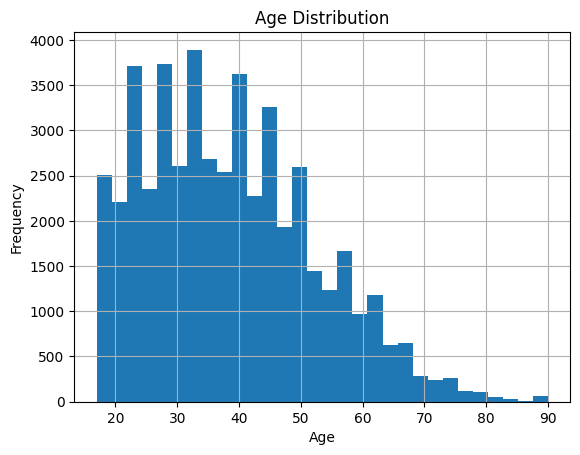

In [33]:
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

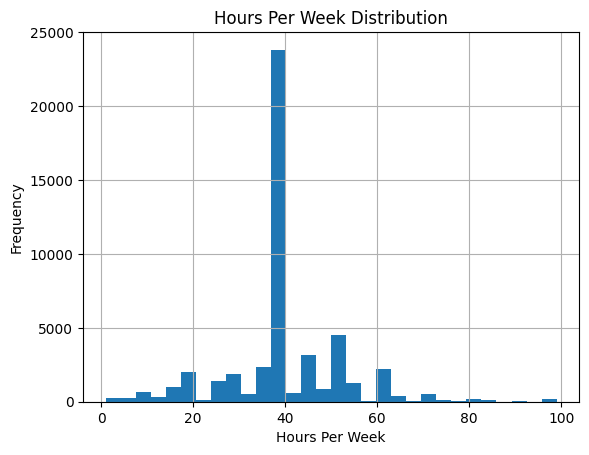

In [34]:
df['hours-per-week'].hist(bins=30)
plt.title('Hours Per Week Distribution')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.show()

These visualizations show significant disparity in income distribution across sex and race in the 1994 Census data. Males and White/Asian-Pac-Islander groups show notably higher rates of >50K income. A model trained on this data will learn these patterns—whether they reflect bias, confounding factors, or historical inequity, Lara's job is to detect and measure the disparity in model outcomes.

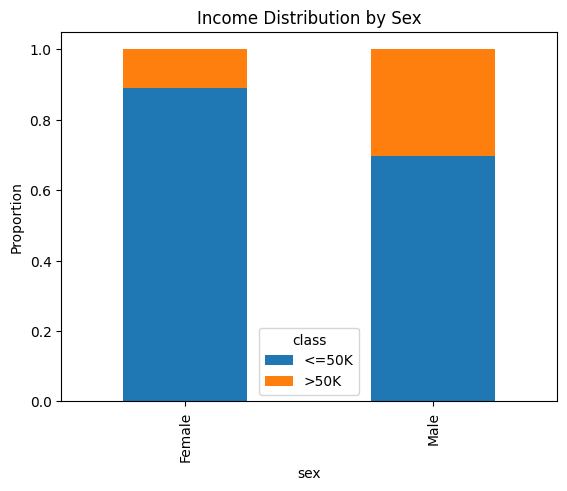

In [35]:
import seaborn as sns

pd.crosstab(df['sex'], df['class'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Income Distribution by Sex')
plt.ylabel('Proportion')
plt.show()

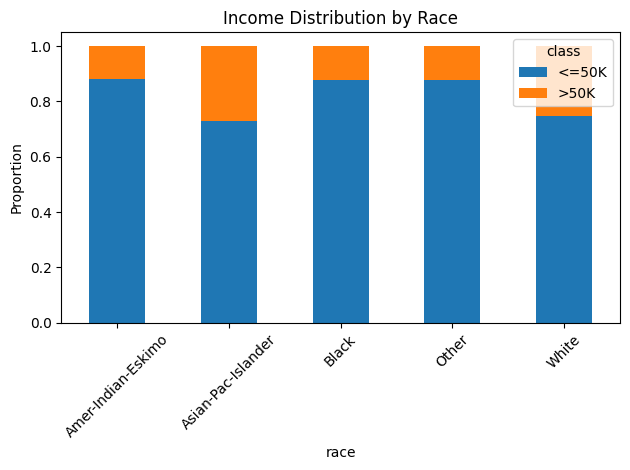

In [36]:
pd.crosstab(df['race'], df['class'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Income Distribution by Race')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()